In [1]:
from DataCollector import DataCollectorv2
from Dataset import DatasetHPs
from NNModel import NNModelHPs
from covit import CovitProject

import matplotlib.pyplot as plt

In [2]:
dc = DataCollectorv2()

Building Data frame
Done building Data frame
Building remote dicts
Done building remote dicts
Building local dicts
Done building local dicts


In [3]:
covit = CovitProject(project_name="107Lins",
                     data_collector=dc)

In [4]:
models = [
    "nn1.2",
    "nn1.4",
    "nn1.6"
         ]

for model in models:
    covit.loadNNModel(model)
    print("Model is {}".format(model))
    model_perf = covit.getResults(name=model).getPerf()
    val_min_loss = min(model_perf["val_loss"])
    val_min_idx = model_perf["val_loss"].index(val_min_loss)
    val_top1_max_acc = model_perf["val_top1_accuracy"][val_min_idx]
    print("===> val top1 accuracy = {}".format(val_top1_max_acc))

perf = {}
for model in models:
    covit.loadNNModel(model)
    model_perf = covit.getResults(name=model).getPerf()
    for metric in model_perf:
        if metric in perf:
            perf[metric].extend(model_perf[metric])
        else:
            perf.update({metric: model_perf[metric]})

2022-07-18 14:11:07.109298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:11:07.130764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:11:07.130886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:11:07.131502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model is nn1.2
===> val top1 accuracy = 0.568475067615509
Model is nn1.4
===> val top1 accuracy = 0.7973785996437073
Model is nn1.6
===> val top1 accuracy = 0.9245042204856873


191
0.9245042204856873	0.9729200005531311	0.9884659051895142


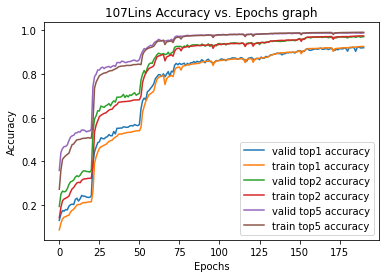

In [5]:
plt.plot(perf["val_top1_accuracy"], label="valid top1 accuracy")
plt.plot(perf["top1_accuracy"], label="train top1 accuracy")
plt.plot(perf["val_top2_accuracy"], label="valid top2 accuracy")
plt.plot(perf["top2_accuracy"], label="train top2 accuracy")
plt.plot(perf["val_top5_accuracy"], label="valid top5 accuracy")
plt.plot(perf["top5_accuracy"], label="train top5 accuracy")


plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("107Lins Accuracy vs. Epochs graph")

plt.savefig("acc.png")

val_min_loss = min(perf["val_loss"])
val_min_idx = perf["val_loss"].index(val_min_loss)
val_top1_max_acc = perf["val_top1_accuracy"][val_min_idx]
val_top2_max_acc = perf["val_top2_accuracy"][val_min_idx]
val_top5_max_acc = perf["val_top5_accuracy"][val_min_idx]
print(len(perf["val_top1_accuracy"]))
print("{}\t{}\t{}".format(val_top1_max_acc,
                          val_top2_max_acc,
                          val_top5_max_acc))

In [6]:
for model in models:
    print("Model is {}".format(model))
    model_times = covit.getResults(name=model).getTimes()
    num_epochs = 0
    for model_num_epochs in model_times["epochs"]:
        num_epochs += model_num_epochs
    batch_size = model_times["batch_size"][0]
    total_time = 0
    for model_train_time in model_times["time"]:
        total_time += model_train_time
    avg_time = total_time / num_epochs
    print("===> batch size = {}".format(batch_size))
    print("===> number of epochs = {}".format(num_epochs))
    print("===> average train time per epoch = {:.2f}[min]".format(avg_time / 60))

Model is nn1.2
===> batch size = 192
===> number of epochs = 51
===> average train time per epoch = 9.49[min]
Model is nn1.4
===> batch size = 96
===> number of epochs = 15
===> average train time per epoch = 18.31[min]
Model is nn1.6
===> batch size = 64
===> number of epochs = 125
===> average train time per epoch = 27.70[min]
